In [1]:
! ls /mnt/ga-et-data

Cloud_Veg_ET  MODIS_NDVI  a.tif  inputsv0  lunch  readme-bucket.md  steffi


In [2]:
! aws s3 ls ga-et-data/Cloud_Veg_ET/Data/ETO/

2020-03-20 22:45:23          0 
2020-03-20 22:46:19   24217376 medianETo001.tif_gw.npy
2020-03-20 22:46:20   24217376 medianETo002.tif_gw.npy
2020-03-20 22:46:20   24217376 medianETo003.tif_gw.npy
2020-03-20 22:46:21   24217376 medianETo004.tif_gw.npy
2020-03-20 22:46:21   24217376 medianETo005.tif_gw.npy
2020-03-20 22:46:40   24217376 medianETo006.tif_gw.npy
2020-03-20 22:46:41   24217376 medianETo007.tif_gw.npy
2020-03-20 22:46:41   24217376 medianETo008.tif_gw.npy
2020-03-20 22:46:42   24217376 medianETo009.tif_gw.npy
2020-03-20 22:46:43   24217376 medianETo010.tif_gw.npy
2020-03-20 22:46:44   24217376 medianETo011.tif_gw.npy
2020-03-20 22:46:44   24217376 medianETo012.tif_gw.npy
2020-03-20 22:46:45   24217376 medianETo013.tif_gw.npy
2020-03-20 22:46:45   24217376 medianETo014.tif_gw.npy
2020-03-20 22:46:46   24217376 medianETo015.tif_gw.npy
2020-03-20 22:46:47   24217376 medianETo016.tif_gw.npy
2020-03-20 22:46:47   24217376 medianETo017.tif_gw.npy
2020-03-20 22:46:48   24217376 me

In [3]:
! ls -l /mnt/ga-et-data/Cloud_Veg_ET/Data/ETO/

total 5817900
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo001.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo002.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo003.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo004.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo005.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo006.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo007.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo008.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo009.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo010.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo011.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo012.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo013.tif_gw.npy
-rwxr-xr-x 1 root root 24217376 Mar 17 22:55 medianETo014.tif_gw.npy
-rwxr-xr-x 1 root ro

# Reference

https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html


The .npz file format is a zipped archive of files named after the variables they contain. The archive is not compressed and each file in the archive contains one variable in .npy format. For a description of the .npy format, see numpy.lib.format.

When opening the saved .npz file with load a NpzFile object is returned. This is a dictionary-like object which can be queried for its list of arrays (with the .files attribute), and for the arrays themselves.

In [3]:
import numpy as np
help(np.load)

Help on function load in module numpy:

load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
    Load arrays or pickled objects from ``.npy``, ``.npz`` or pickled files.
    
    .. warning:: Loading files that contain object arrays uses the ``pickle``
                 module, which is not secure against erroneous or maliciously
                 constructed data. Consider passing ``allow_pickle=False`` to
                 load data that is known not to contain object arrays for the
                 safer handling of untrusted sources.
    
    Parameters
    ----------
    file : file-like object, string, or pathlib.Path
        The file to read. File-like objects must support the
        ``seek()`` and ``read()`` methods. Pickled files require that the
        file-like object support the ``readline()`` method as well.
    mmap_mode : {None, 'r+', 'r', 'w+', 'c'}, optional
        If not None, then memory-map the file, using the given mode (see
        `n

In [4]:
s3fs_fuse_mounted_file_path = '/mnt/ga-et-data/Cloud_Veg_ET/Data/ETO/'
pickled_eto_data_file = 'medianETo246.tif_gw.npy'

full_filename = s3fs_fuse_mounted_file_path + pickled_eto_data_file

median_eto_day_246_array = np.load(full_filename)

In [5]:
ary = median_eto_day_246_array

In [6]:
ary.shape

(3124, 1938)

In [7]:
last_file_shape=ary.shape

In [8]:
ary.max()

5.0655947

In [9]:
ary.min()

-3.4028235e+38

In [10]:
from rasterio.plot import show_hist
#show_hist(ary, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [11]:
ary

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         3.6485620e+00,  3.6485620e+00,  3.6485620e+00],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         3.6485620e+00,  3.6485620e+00,  3.6485620e+00],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
         3.6831279e+00,  3.6831279e+00,  3.6831279e+00],
       ...,
       [ 4.2643900e+00,  4.2643900e+00,  4.2643900e+00, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [ 4.2643900e+00,  4.2643900e+00,  4.2643900e+00, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [ 4.2643900e+00,  4.2643900e+00,  4.2643900e+00, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32)

In [12]:
ary[(ary < 0)] = np.nan

/opt/tljh/user/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


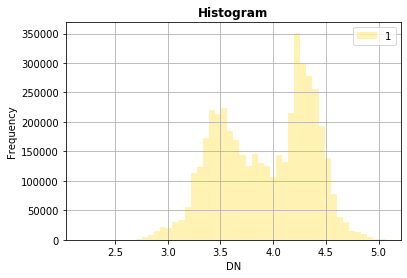

In [13]:
show_hist(ary, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

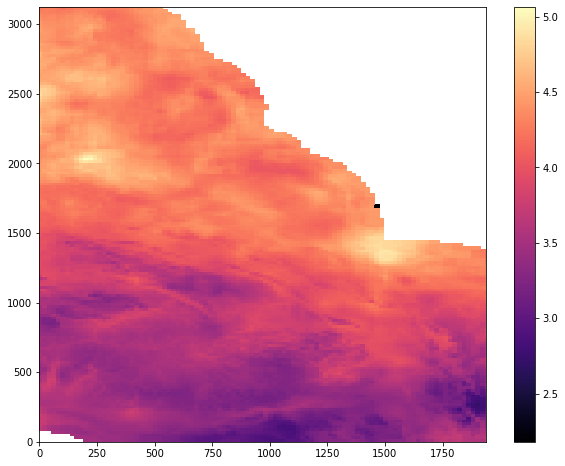

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

mesh = ax.pcolormesh(ary,cmap='magma')
fig.colorbar(mesh)

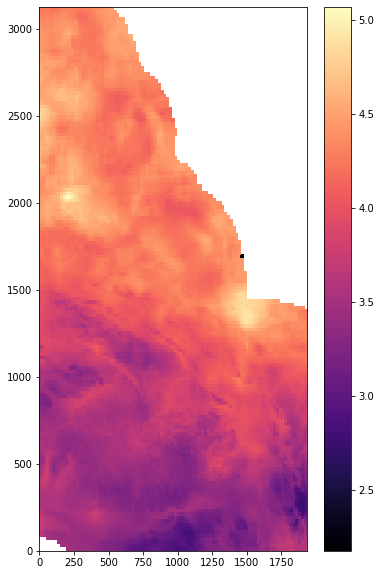

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 10))

mesh = ax.pcolormesh(ary,cmap='magma')
fig.colorbar(mesh)

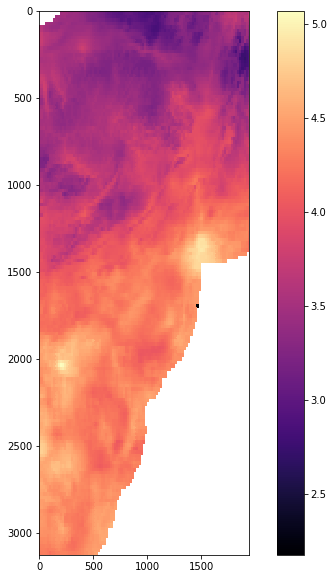

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

mesh = ax.pcolormesh(ary,cmap='magma')
fig.colorbar(mesh)

aspect=ary.shape[0]/ary.shape[1]
adjustable='box'
ax.set_aspect(aspect, adjustable=adjustable)
plt.gca().invert_yaxis()

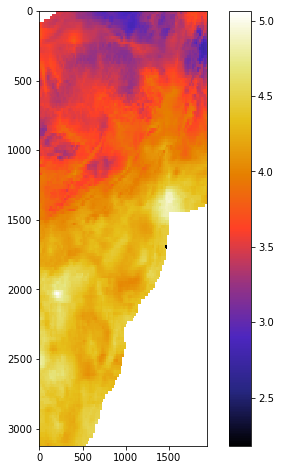

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

mesh = ax.pcolormesh(ary,cmap='CMRmap')
fig.colorbar(mesh)

aspect=ary.shape[0]/ary.shape[1]
adjustable='box'
ax.set_aspect(aspect, adjustable=adjustable)
plt.gca().invert_yaxis()

![](https://s3.amazonaws.com/american-rivers-website/wp-content/uploads/2016/03/27005910/DelawareRiverBasin-01-302x350.png)

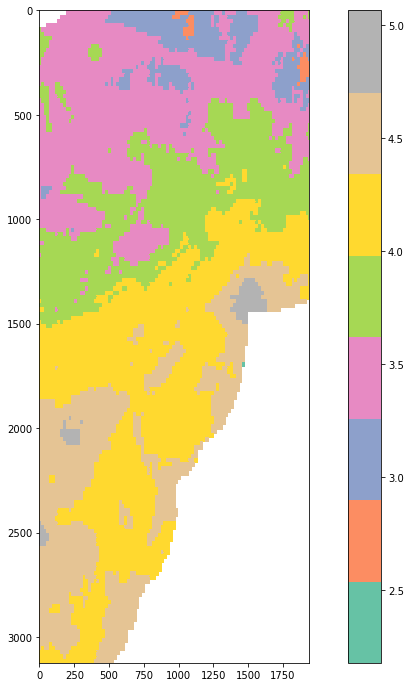

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))

mesh = ax.pcolormesh(ary,cmap='Set2')
fig.colorbar(mesh)

aspect=3/2
adjustable='box'
ax.set_aspect(aspect, adjustable=adjustable)
plt.gca().invert_yaxis()

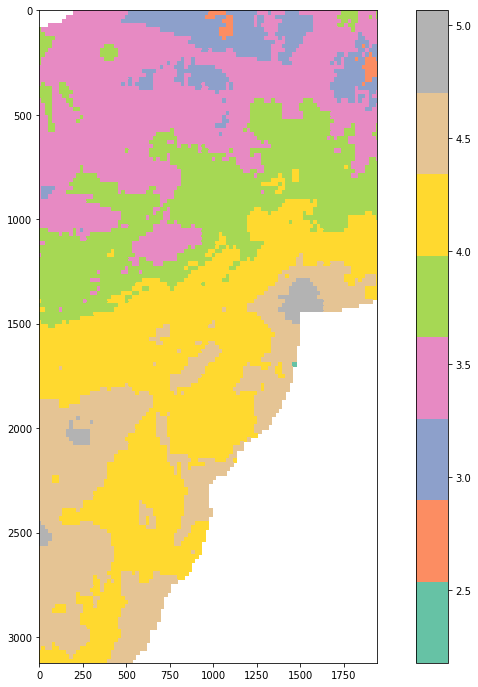

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))

mesh = ax.pcolormesh(ary,cmap='Set2')
fig.colorbar(mesh)

aspect=3/2.5
#adjustable='box'
ax.set_aspect(aspect)
plt.gca().invert_yaxis()

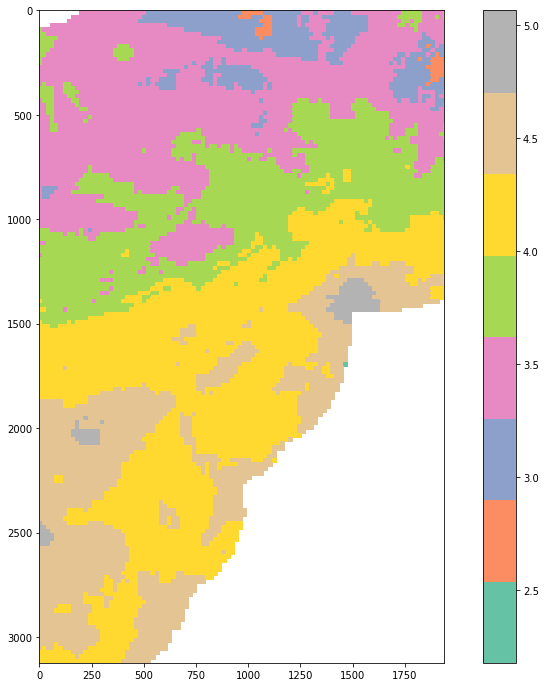

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))

mesh = ax.pcolormesh(ary,cmap='Set2')
fig.colorbar(mesh)

aspect=3/3
#adjustable='box'
ax.set_aspect(aspect)
plt.gca().invert_yaxis()

![](https://www.state.nj.us/drbc/library/images/maps/drb_illustration.jpg)

In [21]:
s3fs_fuse_mounted_file_path = '/mnt/ga-et-data/Cloud_Veg_ET/Data/ETO/'
pickled_eto_data_file = 'medianETo001.tif_gw.npy'

full_filename = s3fs_fuse_mounted_file_path + pickled_eto_data_file

median_eto_day_1_array = np.load(full_filename)

In [22]:
ary = median_eto_day_1_array

In [23]:
ary[(ary < 0)] = np.nan

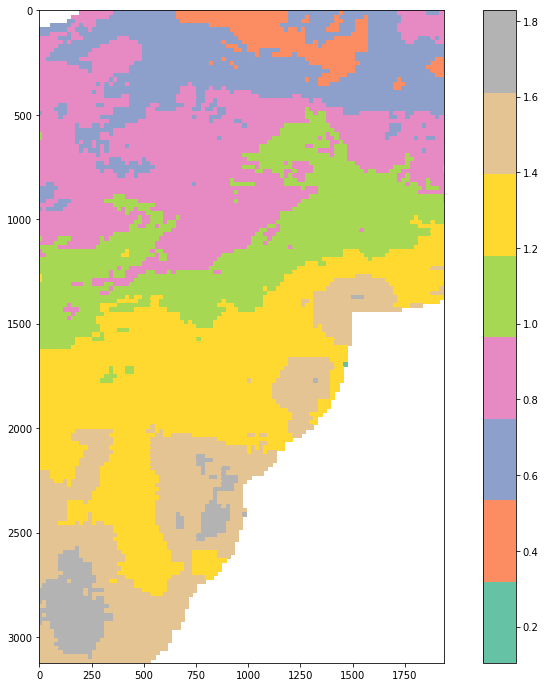

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))

mesh = ax.pcolormesh(ary,cmap='Set2')
fig.colorbar(mesh)

aspect=3/3
#adjustable='box'
ax.set_aspect(aspect)
plt.gca().invert_yaxis()

![](https://s3.amazonaws.com/american-rivers-website/wp-content/uploads/2016/03/27005910/DelawareRiverBasin-01-302x350.png)

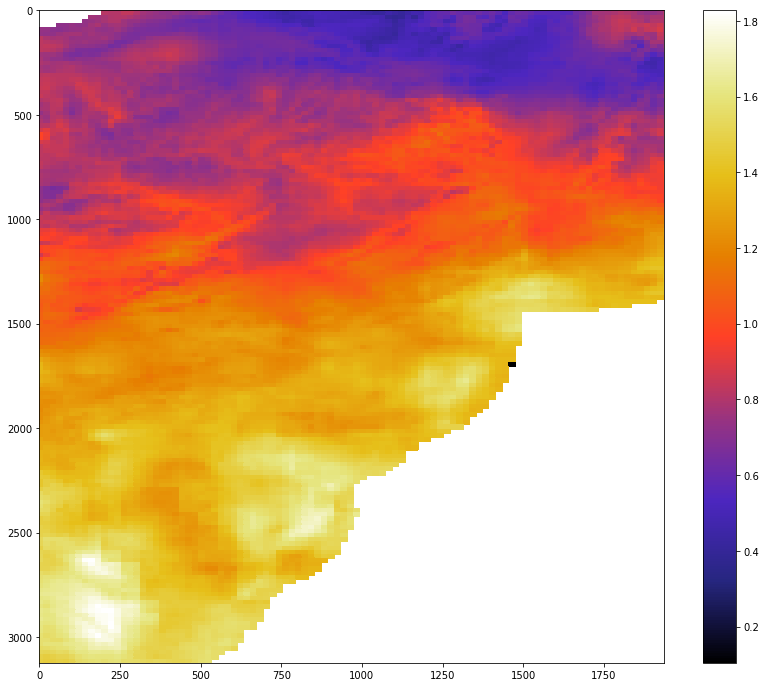

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))

mesh = ax.pcolormesh(ary,cmap='CMRmap')
fig.colorbar(mesh)

#aspect=ary.shape[0]/ary.shape[1]
#adjustable='box'
#ax.set_aspect(aspect, adjustable=adjustable)
plt.gca().invert_yaxis()

In [26]:
last_file_shape

(3124, 1938)

In [27]:
ary.shape

(3124, 1938)

In [28]:
if last_file_shape == ary.shape:
    print('YAY!')

YAY!
